In [1]:
from psychopy import locale_setup
from psychopy import prefs
from psychopy import plugins
plugins.activatePlugins()
from psychopy import sound, gui, visual, core, data, event, logging, clock, colors, layout
from psychopy.tools import environmenttools
from psychopy.constants import (NOT_STARTED, STARTED, PLAYING, PAUSED,
                                STOPPED, FINISHED, PRESSED, RELEASED, FOREVER, priority)

import numpy as np  # whole numpy lib is available, prepend 'np.'
from numpy import (sin, cos, tan, log, log10, pi, average,
                   sqrt, std, deg2rad, rad2deg, linspace, asarray)
from numpy.random import random, randint, normal, shuffle, choice as randchoice
import os  # handy system and path functions
import sys  # to get file system encoding

import psychopy.iohub as io
from psychopy.hardware import keyboard

import itertools

import pandas as pd

from PIL import Image 

/Users/sepehrmortaheb/anaconda3/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(


In [24]:
_thisDir = os.path.dirname(os.path.abspath('./'))
# Store info about the experiment session
psychopyVersion = '2023.2.3'
expName = 'VDT_Test-random-Sphere-1degree-18sec-withReference'
expInfo = {
    'participant': f"sub-",
    'session': 'ses-',
    'run': 'run-',
    'date': data.getDateStr(),  # add a simple timestamp
    'expName': expName,
    'psychopyVersion': psychopyVersion,
}

In [25]:
def showExpInfoDlg(expInfo):
    poppedKeys = {
        'date': expInfo.pop('date', data.getDateStr()),
        'expName': expInfo.pop('expName', expName),
        'psychopyVersion': expInfo.pop('psychopyVersion', psychopyVersion),
    }
    # show participant info dialog
    dlg = gui.DlgFromDict(dictionary=expInfo, sortKeys=False, title=expName)
    if dlg.OK == False:
        core.quit()  # user pressed cancel
    # restore hidden keys
    expInfo.update(poppedKeys)
    # return expInfo
    return expInfo

In [26]:
showExpInfoDlg(expInfo)

SystemExit: 0

In [11]:
def setupData(expInfo, dataDir=None):
    # data file name stem = absolute path + name; later add .psyexp, .csv, .log, etc
    if dataDir is None:
        dataDir = _thisDir
    participant = expInfo["participant"]
    date = expInfo['date']
    filename = f'data/{participant}_{expName}_{date}'
    # make sure filename is relative to dataDir
    if os.path.isabs(filename):
        dataDir = os.path.commonprefix([dataDir, filename])
        filename = os.path.relpath(filename, dataDir)
    
    # an ExperimentHandler isn't essential but helps with data saving
    thisExp = data.ExperimentHandler(
        name=expName, version='',
        extraInfo=expInfo, runtimeInfo=None,
        originPath='./VDT_Test-random-Sphere-1degree-18sec-withReference.py',
        savePickle=True, saveWideText=True,
        dataFileName=dataDir + os.sep + filename, sortColumns='time'
    )
    thisExp.setPriority('thisRow.t', priority.CRITICAL)
    thisExp.setPriority('expName', priority.LOW)
    # return experiment handler
    return thisExp

In [12]:
def setupLogging(filename):
    # this outputs to the screen, not a file
    logging.console.setLevel(logging.EXP)
    # save a log file for detail verbose info
    logFile = logging.LogFile(filename+'.log', level=logging.EXP)
    
    return logFile

In [13]:
def setupWindow(expInfo=None, win=None):
    if win is None:
        # if not given a window to setup, make one
        win = visual.Window(
            size=[1512, 982], fullscr=True, screen=0,
            winType='pyglet', allowStencil=False,
            monitor='testMonitor', color=[-1.0000, -1.0000, -1.0000], colorSpace='rgb',
            backgroundImage='', backgroundFit='none',
            blendMode='avg', useFBO=True,
            units='height'
        )
        if expInfo is not None:
            # store frame rate of monitor if we can measure it
            expInfo['frameRate'] = win.getActualFrameRate()
    else:
        # if we have a window, just set the attributes which are safe to set
        win.color = [-1.0000, -1.0000, -1.0000]
        win.colorSpace = 'rgb'
        win.backgroundImage = ''
        win.backgroundFit = 'none'
        win.units = 'height'
    win.mouseVisible = False
    win.hideMessage()
    return win

In [14]:
def setupInputs(expInfo, thisExp, win):
    # --- Setup input devices ---
    inputs = {}
    ioConfig = {}
    
    # Setup iohub keyboard
    ioConfig['Keyboard'] = dict(use_keymap='psychopy')
    
    ioSession = '1'
    if 'session' in expInfo:
        ioSession = str(expInfo['session'])
    ioServer = io.launchHubServer(window=win, **ioConfig)
    eyetracker = None
    
    # create a default keyboard (e.g. to check for escape)
    defaultKeyboard = keyboard.Keyboard(backend='psychotoolbox')
    # return inputs dict
    return {
        'ioServer': ioServer,
        'defaultKeyboard': defaultKeyboard,
        'eyetracker': eyetracker,
    }

In [15]:
def pauseExperiment(thisExp, inputs=None, win=None, timers=[], playbackComponents=[]):
    # if we are not paused, do nothing
    if thisExp.status != PAUSED:
        return
    
    # pause any playback components
    for comp in playbackComponents:
        comp.pause()
    # prevent components from auto-drawing
    win.stashAutoDraw()
    # run a while loop while we wait to unpause
    while thisExp.status == PAUSED:
        # make sure we have a keyboard
        if inputs is None:
            inputs = {
                'defaultKeyboard': keyboard.Keyboard(backend='ioHub')
            }
        # check for quit (typically the Esc key)
        if inputs['defaultKeyboard'].getKeys(keyList=['escape']):
            endExperiment(thisExp, win=win, inputs=inputs)
        # flip the screen
        win.flip()
    # if stop was requested while paused, quit
    if thisExp.status == FINISHED:
        endExperiment(thisExp, inputs=inputs, win=win)
    # resume any playback components
    for comp in playbackComponents:
        comp.play()
    # restore auto-drawn components
    win.retrieveAutoDraw()
    # reset any timers
    for timer in timers:
        timer.reset()

In [ ]:
def run(expInfo, thisExp, win, inputs, globalClock=None, thisSession=None):
    
    # mark experiment as started
    thisExp.status = STARTED
    # make sure variables created by exec are available globally
    exec = environmenttools.setExecEnvironment(globals())
    # get device handles from dict of input devices
    ioServer = inputs['ioServer']
    defaultKeyboard = inputs['defaultKeyboard']
    eyetracker = inputs['eyetracker']
    # make sure we're running in the directory for this experiment
    os.chdir(_thisDir)
    # get filename from ExperimentHandler for convenience
    filename = thisExp.dataFileName
    frameTolerance = 0.001  # how close to onset before 'same' frame
    endExpNow = False  # flag for 'escape' or other condition => quit the exp
    # get frame duration from frame rate in expInfo
    if 'frameRate' in expInfo and expInfo['frameRate'] is not None:
        frameDur = 1.0 / round(expInfo['frameRate'])
    else:
        frameDur = 1.0 / 60.0  # could not measure, so guess
    
    # Start Code - component code to be run after the window creation
    
    # --- Initialize components for Routine "WaitingForScannerTrigger" ---
    Vertical = visual.ImageStim(
        win=win,
        name='Vertical', 
        image='Sphere-Ref.png', mask=None, anchor='center',
        ori=0.0, pos=(0, 0), size=(2,1),
        color=[1,1,1], colorSpace='rgb', opacity=None,
        flipHoriz=False, flipVert=False,
        texRes=128.0, interpolate=True, depth=0.0)
    key_resp = keyboard.Keyboard()
    
    # --- Initialize components for Routine "VDT" ---
    PresentedLine1 = visual.ImageStim(
        win=win,
        name='PresentedLine1', 
        image='default.png', mask=None, anchor='center',
        ori=0.0, pos=(0, 0), size=(2, 1),
        color=[1,1,1], colorSpace='rgb', opacity=None,
        flipHoriz=False, flipVert=False,
        texRes=128.0, interpolate=True, depth=0.0)
    FixDot2 = visual.ImageStim(
        win=win,
        name='FixDot2', 
        image='VDT_fixation_dot_green_small.png', mask=None, anchor='center',
        ori=0.0, pos=(0, 0), size=(2,1),
        color=[1,1,1], colorSpace='rgb', opacity=None,
        flipHoriz=False, flipVert=False,
        texRes=128.0, interpolate=True, depth=-1.0)
    key_resp_2 = keyboard.Keyboard()
    
    # create some handy timers
    if globalClock is None:
        globalClock = core.Clock()  # to track the time since experiment started
    if ioServer is not None:
        ioServer.syncClock(globalClock)
    logging.setDefaultClock(globalClock)
    routineTimer = core.Clock()  # to track time remaining of each (possibly non-slip) routine
    win.flip()  # flip window to reset last flip timer
    # store the exact time the global clock started
    expInfo['expStart'] = data.getDateStr(format='%Y-%m-%d %Hh%M.%S.%f %z', fractionalSecondDigits=6)
    
    # --- Prepare to start Routine "WaitingForScannerTrigger" ---
    continueRoutine = True
    # update component parameters for each repeat
    thisExp.addData('WaitingForScannerTrigger.started', globalClock.getTime())
    key_resp.keys = []
    key_resp.rt = []
    _key_resp_allKeys = []
    # keep track of which components have finished
    WaitingForScannerTriggerComponents = [Vertical, key_resp]
    for thisComponent in WaitingForScannerTriggerComponents:
        thisComponent.tStart = None
        thisComponent.tStop = None
        thisComponent.tStartRefresh = None
        thisComponent.tStopRefresh = None
        if hasattr(thisComponent, 'status'):
            thisComponent.status = NOT_STARTED
    # reset timers
    t = 0
    _timeToFirstFrame = win.getFutureFlipTime(clock="now")
    frameN = -1
    
    # --- Run Routine "WaitingForScannerTrigger" ---
    routineForceEnded = not continueRoutine
    while continueRoutine:
        # get current time
        t = routineTimer.getTime()
        tThisFlip = win.getFutureFlipTime(clock=routineTimer)
        tThisFlipGlobal = win.getFutureFlipTime(clock=None)
        frameN = frameN + 1  # number of completed frames (so 0 is the first frame)
        # update/draw components on each frame
        
        # *Vertical* updates
        
        # if Vertical is starting this frame...
        if Vertical.status == NOT_STARTED and tThisFlip >= 0.0-frameTolerance:
            # keep track of start time/frame for later
            Vertical.frameNStart = frameN  # exact frame index
            Vertical.tStart = t  # local t and not account for scr refresh
            Vertical.tStartRefresh = tThisFlipGlobal  # on global time
            win.timeOnFlip(Vertical, 'tStartRefresh')  # time at next scr refresh
            # add timestamp to datafile
            thisExp.timestampOnFlip(win, 'Vertical.started')
            # update status
            Vertical.status = STARTED
            Vertical.setAutoDraw(True)
        
        # if Vertical is active this frame...
        if Vertical.status == STARTED:
            # update params
            pass
        
        # *key_resp* updates
        waitOnFlip = False
        
        # if key_resp is starting this frame...
        if key_resp.status == NOT_STARTED and tThisFlip >= 0.0-frameTolerance:
            # keep track of start time/frame for later
            key_resp.frameNStart = frameN  # exact frame index
            key_resp.tStart = t  # local t and not account for scr refresh
            key_resp.tStartRefresh = tThisFlipGlobal  # on global time
            win.timeOnFlip(key_resp, 'tStartRefresh')  # time at next scr refresh
            # add timestamp to datafile
            thisExp.timestampOnFlip(win, 'key_resp.started')
            # update status
            key_resp.status = STARTED
            # keyboard checking is just starting
            waitOnFlip = True
            win.callOnFlip(key_resp.clock.reset)  # t=0 on next screen flip
            win.callOnFlip(key_resp.clearEvents, eventType='keyboard')  # clear events on next screen flip
        if key_resp.status == STARTED and not waitOnFlip:
            theseKeys = key_resp.getKeys(keyList=['s'], ignoreKeys=["escape"], waitRelease=False)
            _key_resp_allKeys.extend(theseKeys)
            if len(_key_resp_allKeys):
                key_resp.keys = _key_resp_allKeys[-1].name  # just the last key pressed
                key_resp.rt = _key_resp_allKeys[-1].rt
                key_resp.duration = _key_resp_allKeys[-1].duration
                # was this correct?
                if (key_resp.keys == str("'space'")) or (key_resp.keys == "'space'"):
                    key_resp.corr = 1
                else:
                    key_resp.corr = 0
                # a response ends the routine
                continueRoutine = False
        
        # check for quit (typically the Esc key)
        if defaultKeyboard.getKeys(keyList=["escape"]):
            thisExp.status = FINISHED
        if thisExp.status == FINISHED or endExpNow:
            endExperiment(thisExp, inputs=inputs, win=win)
            return
        
        # check if all components have finished
        if not continueRoutine:  # a component has requested a forced-end of Routine
            routineForceEnded = True
            break
        continueRoutine = False  # will revert to True if at least one component still running
        for thisComponent in WaitingForScannerTriggerComponents:
            if hasattr(thisComponent, "status") and thisComponent.status != FINISHED:
                continueRoutine = True
                break  # at least one component has not yet finished
        
        # refresh the screen
        if continueRoutine:  # don't flip if this routine is over or we'll get a blank screen
            win.flip()
    
    # --- Ending Routine "WaitingForScannerTrigger" ---
    for thisComponent in WaitingForScannerTriggerComponents:
        if hasattr(thisComponent, "setAutoDraw"):
            thisComponent.setAutoDraw(False)
    thisExp.addData('WaitingForScannerTrigger.stopped', globalClock.getTime())
    # check responses
    if key_resp.keys in ['', [], None]:  # No response was made
        key_resp.keys = None
        # was no response the correct answer?!
        if str("'space'").lower() == 'none':
           key_resp.corr = 1;  # correct non-response
        else:
           key_resp.corr = 0;  # failed to respond (incorrectly)
    # store data for thisExp (ExperimentHandler)
    thisExp.addData('key_resp.keys',key_resp.keys)
    thisExp.addData('key_resp.corr', key_resp.corr)
    if key_resp.keys != None:  # we had a response
        thisExp.addData('key_resp.rt', key_resp.rt)
        thisExp.addData('key_resp.duration', key_resp.duration)
    thisExp.nextEntry()
    # the Routine "WaitingForScannerTrigger" was not non-slip safe, so reset the non-slip timer
    routineTimer.reset()
    
    # set up handler to look after randomisation of conditions etc
    trials = data.TrialHandler(nReps=2.0, method='random', 
        extraInfo=expInfo, originPath=-1,
        trialList=data.importConditions('loopTemplate18.xlsx'),
        seed=None, name='trials')
    thisExp.addLoop(trials)  # add the loop to the experiment
    thisTrial = trials.trialList[0]  # so we can initialise stimuli with some values
    # abbreviate parameter names if possible (e.g. rgb = thisTrial.rgb)
    if thisTrial != None:
        for paramName in thisTrial:
            globals()[paramName] = thisTrial[paramName]
        
    for thisTrial in trials:
        currentLoop = trials
        thisExp.timestampOnFlip(win, 'thisRow.t')
        # pause experiment here if requested
        if thisExp.status == PAUSED:
            pauseExperiment(
                thisExp=thisExp, 
                inputs=inputs, 
                win=win, 
                timers=[routineTimer], 
                playbackComponents=[]
        )
        # abbreviate parameter names if possible (e.g. rgb = thisTrial.rgb)
        if thisTrial != None:
            for paramName in thisTrial:
                globals()[paramName] = thisTrial[paramName]
        
        # --- Prepare to start Routine "VDT" ---
        continueRoutine = True
        # update component parameters for each repeat
        thisExp.addData('VDT.started', globalClock.getTime())
        PresentedLine1.setImage(image)
        key_resp_2.keys = []
        key_resp_2.rt = []
        _key_resp_2_allKeys = []
        # keep track of which components have finished
        VDTComponents = [PresentedLine1, FixDot2, key_resp_2]
        for thisComponent in VDTComponents:
            thisComponent.tStart = None
            thisComponent.tStop = None
            thisComponent.tStartRefresh = None
            thisComponent.tStopRefresh = None
            if hasattr(thisComponent, 'status'):
                thisComponent.status = NOT_STARTED
        # reset timers
        t = 0
        _timeToFirstFrame = win.getFutureFlipTime(clock="now")
        frameN = -1
        
        # --- Run Routine "VDT" ---
        routineForceEnded = not continueRoutine
        while continueRoutine and routineTimer.getTime() < 1.0:
            # get current time
            t = routineTimer.getTime()
            tThisFlip = win.getFutureFlipTime(clock=routineTimer)
            tThisFlipGlobal = win.getFutureFlipTime(clock=None)
            frameN = frameN + 1  # number of completed frames (so 0 is the first frame)
            # update/draw components on each frame
            
            # *PresentedLine1* updates
            
            # if PresentedLine1 is starting this frame...
            if PresentedLine1.status == NOT_STARTED and tThisFlip >= 0.0-frameTolerance:
                # keep track of start time/frame for later
                PresentedLine1.frameNStart = frameN  # exact frame index
                PresentedLine1.tStart = t  # local t and not account for scr refresh
                PresentedLine1.tStartRefresh = tThisFlipGlobal  # on global time
                win.timeOnFlip(PresentedLine1, 'tStartRefresh')  # time at next scr refresh
                # add timestamp to datafile
                thisExp.timestampOnFlip(win, 'PresentedLine1.started')
                # update status
                PresentedLine1.status = STARTED
                PresentedLine1.setAutoDraw(True)
            
            # if PresentedLine1 is active this frame...
            if PresentedLine1.status == STARTED:
                # update params
                pass
            
            # if PresentedLine1 is stopping this frame...
            if PresentedLine1.status == STARTED:
                # is it time to stop? (based on global clock, using actual start)
                if tThisFlipGlobal > PresentedLine1.tStartRefresh + .75-frameTolerance:
                    # keep track of stop time/frame for later
                    PresentedLine1.tStop = t  # not accounting for scr refresh
                    PresentedLine1.frameNStop = frameN  # exact frame index
                    # add timestamp to datafile
                    thisExp.timestampOnFlip(win, 'PresentedLine1.stopped')
                    # update status
                    PresentedLine1.status = FINISHED
                    PresentedLine1.setAutoDraw(False)
            
            # *FixDot2* updates
            
            # if FixDot2 is starting this frame...
            if FixDot2.status == NOT_STARTED and tThisFlip >= .75-frameTolerance:
                # keep track of start time/frame for later
                FixDot2.frameNStart = frameN  # exact frame index
                FixDot2.tStart = t  # local t and not account for scr refresh
                FixDot2.tStartRefresh = tThisFlipGlobal  # on global time
                win.timeOnFlip(FixDot2, 'tStartRefresh')  # time at next scr refresh
                # add timestamp to datafile
                thisExp.timestampOnFlip(win, 'FixDot2.started')
                # update status
                FixDot2.status = STARTED
                FixDot2.setAutoDraw(True)
            
            # if FixDot2 is active this frame...
            if FixDot2.status == STARTED:
                # update params
                pass
            
            # if FixDot2 is stopping this frame...
            if FixDot2.status == STARTED:
                # is it time to stop? (based on global clock, using actual start)
                if tThisFlipGlobal > FixDot2.tStartRefresh + .25-frameTolerance:
                    # keep track of stop time/frame for later
                    FixDot2.tStop = t  # not accounting for scr refresh
                    FixDot2.frameNStop = frameN  # exact frame index
                    # add timestamp to datafile
                    thisExp.timestampOnFlip(win, 'FixDot2.stopped')
                    # update status
                    FixDot2.status = FINISHED
                    FixDot2.setAutoDraw(False)
            
            # *key_resp_2* updates
            waitOnFlip = False
            
            # if key_resp_2 is starting this frame...
            if key_resp_2.status == NOT_STARTED and tThisFlip >= 0.0-frameTolerance:
                # keep track of start time/frame for later
                key_resp_2.frameNStart = frameN  # exact frame index
                key_resp_2.tStart = t  # local t and not account for scr refresh
                key_resp_2.tStartRefresh = tThisFlipGlobal  # on global time
                win.timeOnFlip(key_resp_2, 'tStartRefresh')  # time at next scr refresh
                # add timestamp to datafile
                thisExp.timestampOnFlip(win, 'key_resp_2.started')
                # update status
                key_resp_2.status = STARTED
                # keyboard checking is just starting
                waitOnFlip = True
                win.callOnFlip(key_resp_2.clock.reset)  # t=0 on next screen flip
                win.callOnFlip(key_resp_2.clearEvents, eventType='keyboard')  # clear events on next screen flip
            
            # if key_resp_2 is stopping this frame...
            if key_resp_2.status == STARTED:
                # is it time to stop? (based on global clock, using actual start)
                if tThisFlipGlobal > key_resp_2.tStartRefresh + 1-frameTolerance:
                    # keep track of stop time/frame for later
                    key_resp_2.tStop = t  # not accounting for scr refresh
                    key_resp_2.frameNStop = frameN  # exact frame index
                    # add timestamp to datafile
                    thisExp.timestampOnFlip(win, 'key_resp_2.stopped')
                    # update status
                    key_resp_2.status = FINISHED
                    key_resp_2.status = FINISHED
            if key_resp_2.status == STARTED and not waitOnFlip:
                theseKeys = key_resp_2.getKeys(keyList=['space'], ignoreKeys=["escape"], waitRelease=False)
                _key_resp_2_allKeys.extend(theseKeys)
                if len(_key_resp_2_allKeys):
                    key_resp_2.keys = [key.name for key in _key_resp_2_allKeys]  # storing all keys
                    key_resp_2.rt = [key.rt for key in _key_resp_2_allKeys]
                    key_resp_2.duration = [key.duration for key in _key_resp_2_allKeys]
                    # was this correct?
                    if (key_resp_2.keys == str("'space'")) or (key_resp_2.keys == "'space'"):
                        key_resp_2.corr = 1
                    else:
                        key_resp_2.corr = 0
            
            # check for quit (typically the Esc key)
            if defaultKeyboard.getKeys(keyList=["escape"]):
                thisExp.status = FINISHED
            if thisExp.status == FINISHED or endExpNow:
                endExperiment(thisExp, inputs=inputs, win=win)
                return
            
            # check if all components have finished
            if not continueRoutine:  # a component has requested a forced-end of Routine
                routineForceEnded = True
                break
            continueRoutine = False  # will revert to True if at least one component still running
            for thisComponent in VDTComponents:
                if hasattr(thisComponent, "status") and thisComponent.status != FINISHED:
                    continueRoutine = True
                    break  # at least one component has not yet finished
            
            # refresh the screen
            if continueRoutine:  # don't flip if this routine is over or we'll get a blank screen
                win.flip()
        
        # --- Ending Routine "VDT" ---
        for thisComponent in VDTComponents:
            if hasattr(thisComponent, "setAutoDraw"):
                thisComponent.setAutoDraw(False)
        thisExp.addData('VDT.stopped', globalClock.getTime())
        # check responses
        if key_resp_2.keys in ['', [], None]:  # No response was made
            key_resp_2.keys = None
            # was no response the correct answer?!
            if str("'space'").lower() == 'none':
               key_resp_2.corr = 1;  # correct non-response
            else:
               key_resp_2.corr = 0;  # failed to respond (incorrectly)
        # store data for trials (TrialHandler)
        trials.addData('key_resp_2.keys',key_resp_2.keys)
        trials.addData('key_resp_2.corr', key_resp_2.corr)
        if key_resp_2.keys != None:  # we had a response
            trials.addData('key_resp_2.rt', key_resp_2.rt)
            trials.addData('key_resp_2.duration', key_resp_2.duration)
        # using non-slip timing so subtract the expected duration of this Routine (unless ended on request)
        if routineForceEnded:
            routineTimer.reset()
        else:
            routineTimer.addTime(-1.000000)
        thisExp.nextEntry()
        
        if thisSession is not None:
            # if running in a Session with a Liaison client, send data up to now
            thisSession.sendExperimentData()
    # completed 2.0 repeats of 'trials'
    
    
    # mark experiment as finished
    endExperiment(thisExp, win=win, inputs=inputs)


In [192]:
trials = data.TrialHandler(nReps=6, method='random', 
        extraInfo=expInfo, originPath=-1,
        trialList=data.importConditions('loopTemplate18.xlsx'),
        seed=None, name='trials')

In [157]:
trials.data['ran'] = np.ma.masked_array(data=[[0.0]]*18, mask=[[False]]*18, fill_value=1e+20, dtype=np.float32)
trials.data['order'] = np.ma.masked_array(data=[[0.0]]*18, mask=[[True]]*18, fill_value=1e+20, dtype=np.float32)

In [193]:
trials

psychopy.data.TrialHandler(
	data={'ran': masked_array(
  data=[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
  mask=[[False, False, False, False, False, False],
        [False, False, False, False, False, False],
        [False, False, False, False, False, False]],
  fill_value=1e+20,
  dtype=float32), 'order': masked_array(
  data=[[--, --, --, --, --, --],
        [--, --, --, --, --, --],
        [--, --, --, --, --, --]],
  mask=[[ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)}
	autoLog=True
	extraInfo={'participant': '01', 'session': '001', 'date': '2024-01-26_10h41.17.932', 'expName': 'VDT_Test-random-Sphere-1degree-18sec-withReference', 'psychopyVersion': '2023.2.3'}
	finished=False
	method=random
	nRemaining=18
	nReps=6
	nTotal=18
	name=trials
	origin=None
	originPath=-1
	see

In [194]:
for a in trials: 
    print(a)

{'image': 'Sphere-CW-1.png'}
{'image': 'Sphere-CCW-1.png'}
{'image': 'Sphere-White.png'}
{'image': 'Sphere-CW-1.png'}
{'image': 'Sphere-White.png'}
{'image': 'Sphere-CCW-1.png'}
{'image': 'Sphere-White.png'}
{'image': 'Sphere-CW-1.png'}
{'image': 'Sphere-CCW-1.png'}
{'image': 'Sphere-CW-1.png'}
{'image': 'Sphere-CCW-1.png'}
{'image': 'Sphere-White.png'}
{'image': 'Sphere-White.png'}
{'image': 'Sphere-CCW-1.png'}
{'image': 'Sphere-CW-1.png'}
{'image': 'Sphere-CW-1.png'}
{'image': 'Sphere-CCW-1.png'}
{'image': 'Sphere-White.png'}


In [142]:
arr = ['OB', 'OB', 'OB', 'OB', 'ST', 'ST', 'ST', 'ST']
np.random.shuffle(arr)
arr2 = ['ST', 'ST'] + arr

for i in range(len(arr2)):
    if arr2[i] == 'OB':
        arr2[i] = ['OB', 'ST', 'ST']

arr3 = []
for i in range(len(arr2)):
    if len(arr2[i]) == 2: 
        arr3 = arr3 + [arr2[i]]
    else: 
        arr3 = arr3 + arr2[i]

for i in range(len(arr3)):
    if arr3[i] == 'ST':
        arr3[i] = 1
    else:
        arr3[i] = 0
        
idx = np.where(arr3)[0]
np.random.shuffle(idx)
idxx = list(idx[0:7])

for i in idxx:
    arr3[i] = 2

arr3

[1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 1, 0, 2, 1]

In [185]:
np.array(arr3).reshape(3, 6, order='F')

array([[1, 2, 1, 2, 0, 0],
       [2, 0, 2, 2, 1, 2],
       [2, 1, 0, 1, 1, 1]])

In [171]:
type(trials.sequenceIndices[0][0])

int

In [225]:
trials = data.TrialHandler(nReps=6, method='ranom', 
        extraInfo=expInfo, originPath=-1,
        trialList=data.importConditions('loopTemplate18.xlsx'),
        seed=None, name='trials')

arr = ['OB', 'OB', 'OB', 'OB', 'ST', 'ST', 'ST', 'ST']
np.random.shuffle(arr)
arr2 = ['ST', 'ST'] + arr
for i in range(len(arr2)):
    if arr2[i] == 'OB':
        arr2[i] = ['OB', 'ST', 'ST']
arr3 = []
for i in range(len(arr2)):
    if len(arr2[i]) == 2: 
        arr3 = arr3 + [arr2[i]]
    else: 
        arr3 = arr3 + arr2[i]
for i in range(len(arr3)):
    if arr3[i] == 'ST':
        arr3[i] = 1
    else:
        arr3[i] = 0        
idx = np.where(arr3)[0]
np.random.shuffle(idx)
idxx = list(idx[0:7])
for i in idxx:
    arr3[i] = 2

trials.sequenceIndices = np.array(arr3).reshape(3, 6, order='F')
trials.trialList[1]['image'] = f'Sphere-CW-5.png'
trials.trialList[2]['image'] = f'Sphere-CCW-5.png'

for a in trials:
    print(a)


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [226]:
trials

psychopy.data.TrialHandler(
	data={'ran': masked_array(
  data=[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
  mask=[[False, False, False, False, False, False],
        [False, False, False, False, False, False],
        [False, False, False, False, False, False]],
  fill_value=1e+20,
  dtype=float32), 'order': masked_array(
  data=[[--, --, --, --, --, --],
        [--, --, --, --, --, --],
        [--, --, --, --, --, --]],
  mask=[[ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)}
	autoLog=True
	extraInfo={'participant': '01', 'session': '001', 'date': '2024-01-26_10h41.17.932', 'expName': 'VDT_Test-random-Sphere-1degree-18sec-withReference', 'psychopyVersion': '2023.2.3'}
	finished=True
	method=ranom
	nRemaining=-1
	nReps=6
	nTotal=18
	name=trials
	origin=None
	originPath=-1
	seed=

In [231]:
df = pd.DataFrame([])
df['image'] = ['Sphere-White.png']*len(arr3)
for i in range(len(df)):
    if arr3[i] == 1:
        df.loc[i, 'image'] = f'Sphere-CW-5.png'
    elif arr3[i] == 2:
        df.loc[i, 'image'] = f'Sphere-CCW-5.png'
        
df

,image
0,Sphere-CCW-5.png
1,Sphere-CCW-5.png
2,Sphere-White.png
3,Sphere-CW-5.png
4,Sphere-CCW-5.png
5,Sphere-CW-5.png
6,Sphere-CW-5.png
7,Sphere-CCW-5.png
8,Sphere-White.png
9,Sphere-CW-5.png


In [130]:
arr = ['OB', 'OB', 'OB', 'OB', 'ST', 'ST', 'ST', 'ST']
np.random.shuffle(arr)
arr2 = ['ST', 'ST'] + arr
for i in range(len(arr2)):
    if arr2[i] == 'OB':
        arr2[i] = ['OB', 'ST', 'ST']
arr3 = []
for i in range(len(arr2)):
    if len(arr2[i]) == 2: 
        arr3 = arr3 + [arr2[i]]
    else: 
        arr3 = arr3 + arr2[i]
for i in range(len(arr3)):
    if arr3[i] == 'ST':
        arr3[i] = 1
    else:
        arr3[i] = 0        
idx = np.where(arr3)[0]
np.random.shuffle(idx)
idxx = list(idx[0:7])
for i in idxx:
    arr3[i] = 2

In [100]:
idx0 = np.where(np.array(arr3)==0)[0]
np.random.shuffle(idx0)
idxy = list(idx0[0:2])

idxtmp = list(np.unique(np.array([np.arange(i-2,i+3) for i in idxy]).reshape(10)))
idx1 = np.where(np.array(arr3)==1)[0]
idx1 = idx1[idx1>1]
idx1 = idx1[~np.in1d(idx1, idxtmp)]
idxy = idxy + [idx1[np.random.randint(0, len(idx1))]]

idxtmp = list(np.unique(np.array([np.arange(i-2,i+3) for i in idxy]).reshape(15)))
idx2 = np.where(np.array(arr3)==2)[0]
idx2 = idx2[idx2>1]
idx2 = idx2[~np.in1d(idx2, idxtmp)]
idxy = idxy + [idx2[np.random.randint(0, len(idx2))]]

ValueError: high <= 0

In [89]:
idx0 = np.where(np.array(arr3)==0)[0]
np.random.shuffle(idx0)
idxy = list(idx0[0:2])

idxtmp = list(np.unique(np.array([np.arange(i-2,i+3) for i in idxy]).reshape(10)))
idx1 = np.where(np.array(arr3)==1)[0]

In [91]:
idx1[idx1>1]

array([ 2,  3,  5,  6, 11, 13, 14])

In [92]:
idx1 = idx1[~np.in1d(idx1, idxtmp)]

In [93]:
idxy = idxy + [idx1[np.random.randint(0, len(idx1))]]


In [110]:
idx = np.where(np.array(arr3)==0)[0]
np.random.shuffle(idx)

arr3[idx[0]] = 'OBY'
arr3[idx[1]] = 'OBY'
arr3[idx[2]] = 'STCY'
arr3[idx[3]] = 'STCCY'

idx1 = np.where(np.array(arr3)==1)[0]

<ipython-input-110-4f28e9655232>:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  idx1 = np.where(np.array(arr3)==1)[0]


In [108]:
idx1[0:6]

array([], dtype=int64)

In [101]:
arr3

[2, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 2]

In [131]:
idx0 = np.where(np.array(arr3)==0)[0]
idx1 = np.where(np.array(arr3)==1)[0]
idx2 = np.where(np.array(arr3)==2)[0]

np.random.shuffle(idx0)
np.random.shuffle(idx1)
np.random.shuffle(idx2)

arr3[idx0[0]] = 'OBY'
arr3[idx0[1]] = 'OBY'
arr3[idx0[2]] = 'STCY'
arr3[idx0[3]] = 'STCCY'

for i in range(6):
    arr3[idx1[i]]='STCW'
    arr3[idx2[i]]='STCCW'
    
idx_obw = np.where([isinstance(i, int) for i in arr3])[0]
for i in range(2):
    arr3[idx_obw[i]] = 'OBW'
    
arr3

['STCCW',
 'STCW',
 'STCY',
 'STCCW',
 'STCW',
 'OBY',
 'STCCW',
 'OBW',
 'OBY',
 'STCW',
 'STCCW',
 'STCW',
 'STCW',
 'STCW',
 'STCCY',
 'STCCW',
 'STCCW',
 'OBW']

In [13]:
BG = 'black'

circle = Image.open('./images2/circle-black.png')
circle_data = np.array(list(circle.getdata()))

dot = Image.open('./images2/dot-black.png')
dot_data = np.array(list(dot.getdata()))

for deg in [3, 2.5, 2, 1.5, 1, 0.5, -0.5, -1, -1.5, -2, -2.5, -3]:
    img = Image.open('./images2/Sphere-Ref.png');
    img2 = img.rotate(deg, resample=Image.Resampling.BICUBIC)
    
    data = np.array(list(img2.getdata()))
            
    data2 = data + dot_data + circle_data  
    
    data2 = list(tuple(map(tuple, data2)))
            
    img2.putdata(data2)
    
    if deg < 0:
        cw = 'CW'
    else:
        cw = 'CCW'
    img2.save(f'./images_svg/Sphere_{cw}-{abs(deg)}_BG-{BG}_stim-white.png')


In [14]:
BG = 'black'

circle = Image.open('./images2/circle-black.png')
circle_data = np.array(list(circle.getdata()))

dot = Image.open('./images2/dot-black.png')
dot_data = np.array(list(dot.getdata()))

for deg in [3, 2.5, 2, 1.5, 1, 0.5, -0.5, -1, -1.5, -2, -2.5, -3]:
    img = Image.open('./images2/Sphere-Ref_yellow.png');
    img2 = img.rotate(deg, resample=Image.Resampling.BICUBIC)
    
    data = np.array(list(img2.getdata()))
            
    data2 = data + dot_data + circle_data  
    
    data2 = list(tuple(map(tuple, data2)))
            
    img2.putdata(data2)
    
    if deg < 0:
        cw = 'CW'
    else:
        cw = 'CCW'
    img2.save(f'./images_svg/Sphere_{cw}-{abs(deg)}_BG-{BG}_stim-yellow.png')

In [15]:
img = Image.open('./images2/Sphere-Ref.png');
    
data = np.array(list(img.getdata()))
            
data2 = data + dot_data + circle_data  
    
data2 = list(tuple(map(tuple, data2)))
            
img.putdata(data2)

img.save('./images_svg/Sphere_Ref_BG-black_stim-white.png')

In [88]:
imgtmp = Image.open("./images/Sphere-yellow.png");
datatmp = list(imgtmp.getdata())

white_files = [f for f in os.listdir('./images2') if f.endswith('white.png')]

for f in white_files:
    img3 = Image.open(f'./images2/{f}');
    data3 = list(img3.getdata())
    
    for i in range(len(datatmp)):
        if (datatmp[i] != (255,255, 255)) & (datatmp[i] != (0,0,0)):
            data3[i] = datatmp[i]
    
    img3.putdata(data3)
    
    new_name = f.replace('white', 'yellow')
    
    img3.save(f'./images2/{new_name}')

In [17]:
BG = 'grey'

circle = Image.open('./images2/circle-black.png')
circle_data = np.array(list(circle.getdata()))

dot = Image.open('./images2/dot-black.png')
dot_data = np.array(list(dot.getdata()))

for deg in [3, 2.5, 2, 1.5, 1, 0.5, -0.5, -1, -1.5, -2, -2.5, -3]:
    img = Image.open('./images2/Sphere-Ref.png');
    img2 = img.rotate(deg, resample=Image.Resampling.BICUBIC)
    
    data = np.array(list(img2.getdata()))
            
    data2 = data + dot_data + circle_data + 109  
    
    data2 = list(tuple(map(tuple, data2)))
            
    img2.putdata(data2)
    
    if deg < 0:
        cw = 'CW'
    else:
        cw = 'CCW'
    img2.save(f'./images_svg/Sphere_{cw}-{abs(deg)}_BG-{BG}_stim-white.png')

In [18]:
img = Image.open('./images2/Sphere-Ref.png');
    
data = np.array(list(img.getdata()))
            
data2 = data + dot_data + circle_data + 109

data2[data2 > 255] = 255
    
data2 = list(tuple(map(tuple, data2)))
            
img.putdata(data2)

img.save('./images_svg/Sphere_Ref_BG-grey_stim-white.png')

In [19]:
BG = 'grey'

circle = Image.open('./images2/circle-black.png')
circle_data = np.array(list(circle.getdata()))

dot = Image.open('./images2/dot-black.png')
dot_data = np.array(list(dot.getdata()))

for deg in [3, 2.5, 2, 1.5, 1, 0.5, -0.5, -1, -1.5, -2, -2.5, -3]:
    img = Image.open('./images2/Sphere-Ref_yellow.png');
    img2 = img.rotate(deg, resample=Image.Resampling.BICUBIC)
    
    data = np.array(list(img2.getdata()))
            
    data2 = data + dot_data + circle_data
    
    data2[data2>255] = 255
    
    data2 = data2 - 109
    
    data2[data2<0] = 0 
    
    data2 = data2 + 109
    
    data2 = list(tuple(map(tuple, data2)))
            
    img2.putdata(data2)
    
    if deg < 0:
        cw = 'CW'
    else:
        cw = 'CCW'
    img2.save(f'./images_svg/Sphere_{cw}-{abs(deg)}_BG-{BG}_stim-yellow.png')

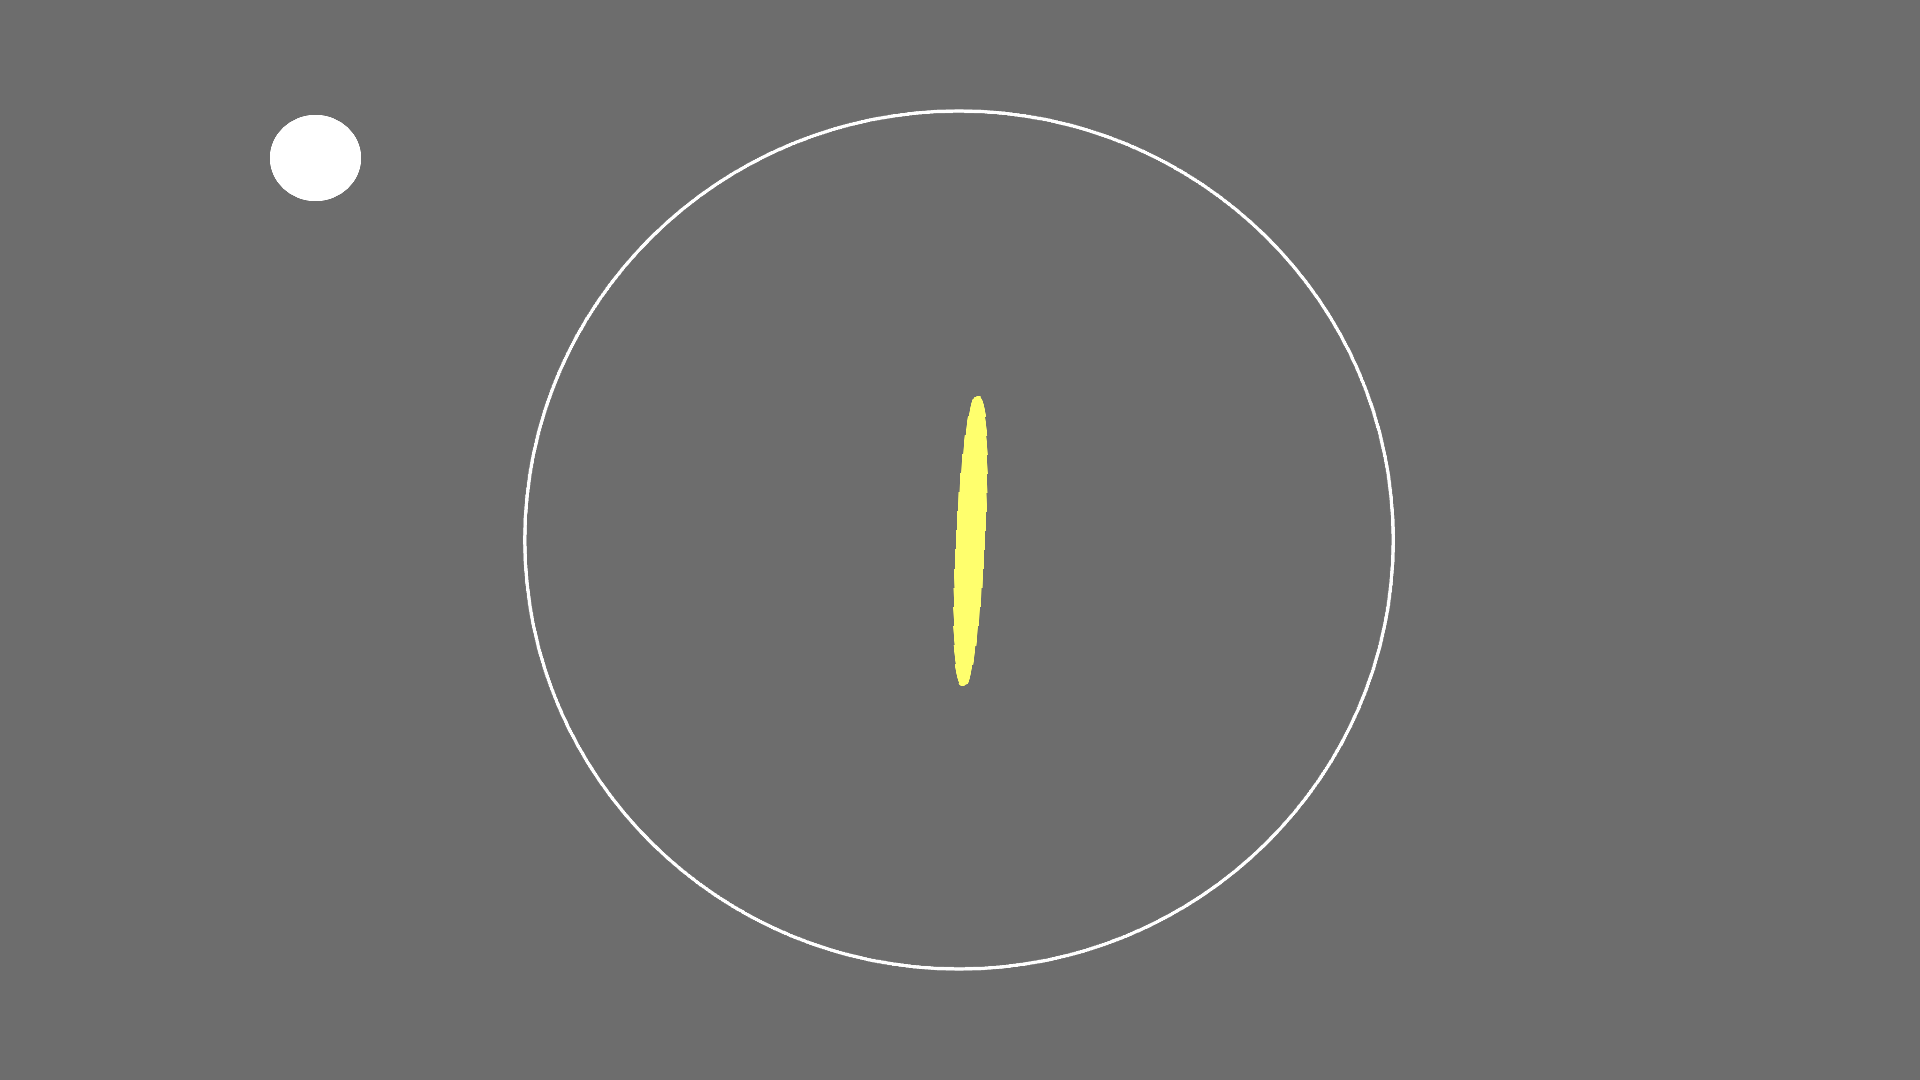

In [31]:
img3 = img2

data3 = np.array(list(img3.getdata()))

data3 = data3 + 109 

data3 = list(tuple(map(tuple, data3)))

img3.putdata(data3)

img3

In [44]:
circle = Image.open('./images2/circle-black.png')
circle_data = np.array(list(circle.getdata()))
circle_data = circle_data + 109 
circle_data[circle_data > 255] = 255
circle_data = list(tuple(map(tuple, circle_data)))
circle.putdata(circle_data)
circle.save('./images2/circle-grey.png')

dot = Image.open('./images2/dot-black.png')
dot_data = np.array(list(dot.getdata()))
dot_data = dot_data + 109 
dot_data[dot_data > 255] = 255
dot_data = list(tuple(map(tuple, dot_data)))
dot.putdata(dot_data)
dot.save('./images2/dot-grey.png')

In [20]:
img = Image.open('./images2/Sphere-Ref_yellow.png');

circle = Image.open('./images2/circle-black.png')
circle_data = np.array(list(circle.getdata()))

dot = Image.open('./images2/dot-black.png')
dot_data = np.array(list(dot.getdata()))
    
data = np.array(list(img.getdata()))
            
data2 = data + dot_data + circle_data

data2[data2 > 255] = 255

data2 = data2 - 109 

data2[data2 < 0] = 0

data2 = data2 + 109
    
data2 = list(tuple(map(tuple, data2)))
            
img.putdata(data2)

img.save('./images_svg/Sphere_Ref_BG-grey_stim-yellow.png')

In [21]:
img = Image.open('./images2/Sphere-Ref.png');

circle = Image.open('./images2/circle-black.png')
circle_data = np.array(list(circle.getdata()))
    
data = np.array(list(img.getdata()))

            
data2 = data + circle_data + 109 

data2[data2 > 255] = 255
    
data2 = list(tuple(map(tuple, data2)))
            
img.putdata(data2)

img.save('./images_svg/Ref_grey.png')